# Lab: Logistic Regression, LDA, QDA, and KNN

## 4.6.1 The Data

In [171]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns

%matplotlib inline

In [172]:
# Import data
df = pd.read_csv('./datasets/Smarket.csv',usecols=range(1,10), index_col=0, parse_dates=True)
df.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
2001-01-01,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001-01-01,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001-01-01,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
2001-01-01,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
2001-01-01,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [173]:
# Features
print(df.columns)

Index(['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today', 'Direction'], dtype='object')


In [174]:
# Shape
print(df.shape)

(1250, 8)


In [175]:
# Summary
print(df.describe())

              Lag1         Lag2         Lag3         Lag4        Lag5  \
count  1250.000000  1250.000000  1250.000000  1250.000000  1250.00000   
mean      0.003834     0.003919     0.001716     0.001636     0.00561   
std       1.136299     1.136280     1.138703     1.138774     1.14755   
min      -4.922000    -4.922000    -4.922000    -4.922000    -4.92200   
25%      -0.639500    -0.639500    -0.640000    -0.640000    -0.64000   
50%       0.039000     0.039000     0.038500     0.038500     0.03850   
75%       0.596750     0.596750     0.596750     0.596750     0.59700   
max       5.733000     5.733000     5.733000     5.733000     5.73300   

            Volume        Today  
count  1250.000000  1250.000000  
mean      1.478305     0.003138  
std       0.360357     1.136334  
min       0.356070    -4.922000  
25%       1.257400    -0.639500  
50%       1.422950     0.038500  
75%       1.641675     0.596750  
max       3.152470     5.733000  


In [176]:
# Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1250 entries, 2001-01-01 to 2005-01-01
Data columns (total 8 columns):
Lag1         1250 non-null float64
Lag2         1250 non-null float64
Lag3         1250 non-null float64
Lag4         1250 non-null float64
Lag5         1250 non-null float64
Volume       1250 non-null float64
Today        1250 non-null float64
Direction    1250 non-null object
dtypes: float64(7), object(1)
memory usage: 87.9+ KB
None


In [177]:
# Correlation
print(df.corr())

            Lag1      Lag2      Lag3      Lag4      Lag5    Volume     Today
Lag1    1.000000 -0.026294 -0.010803 -0.002986 -0.005675  0.040910 -0.026155
Lag2   -0.026294  1.000000 -0.025897 -0.010854 -0.003558 -0.043383 -0.010250
Lag3   -0.010803 -0.025897  1.000000 -0.024051 -0.018808 -0.041824 -0.002448
Lag4   -0.002986 -0.010854 -0.024051  1.000000 -0.027084 -0.048414 -0.006900
Lag5   -0.005675 -0.003558 -0.018808 -0.027084  1.000000 -0.022002 -0.034860
Volume  0.040910 -0.043383 -0.041824 -0.048414 -0.022002  1.000000  0.014592
Today  -0.026155 -0.010250 -0.002448 -0.006900 -0.034860  0.014592  1.000000


## 4.6.2 Logistic Regression

We now fit a logistic regression in order to predict **Direction** using **Lag1** through **Lag5** and **Volume**. We use the *glm()* function from statsmodels. It takes as an input a formula, a dataset, and a family. In our case, we use the Binomial family to perform the logistic regression.

In [178]:
formula = 'Direction ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume'

In [179]:
model = sm.formula.glm(formula,df,family = sm.families.Binomial())
result = model.fit()

In [180]:
print(result.summary())

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1250
Model:                                              GLM   Df Residuals:                     1243
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                             1.0
Method:                                            IRLS   Log-Likelihood:                -863.79
Date:                                  Wed, 11 Jul 2018   Deviance:                       1727.6
Time:                                          21:00:12   Pearson chi2:                 1.25e+03
No. Iterations:                                       4                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------

The smallest p-value is associated with lag1. However, at a value of 0.145, there is no clear evidence of a real association between **Lag1** and **Direction**. We now list the coefficient of the model.

In [181]:
print("Coeffieients")
print(result.params)
print
print("p-Values")
print(result.pvalues)
print
print("Dependent variables")
print(result.model.endog_names)

Coeffieients
Intercept    0.126000
Lag1         0.073074
Lag2         0.042301
Lag3        -0.011085
Lag4        -0.009359
Lag5        -0.010313
Volume      -0.135441
dtype: float64
p-Values
Intercept    0.600700
Lag1         0.145232
Lag2         0.398352
Lag3         0.824334
Lag4         0.851445
Lag5         0.834998
Volume       0.392404
dtype: float64
Dependent variables
['Direction[Down]', 'Direction[Up]']


The ${\tt predict()}$ function can be used to predict the probability that the market will go down, given values of the predictors. If no data set is supplied to the ${\tt predict()}$ function, then the probabilities are computed for the training data that was used to fit the logistic regression model.

In [182]:
predictions = result.predict()
print(predictions[0:10])

[0.49291587 0.51853212 0.51886117 0.48477764 0.48921884 0.49304354
 0.50734913 0.49077084 0.48238647 0.51116222]


In [183]:
# Assign predictions
glm_pred = ['Up' if x<0.5 else 'Down' for x in predictions]

In [184]:
# Confusion matrix
confusion_matrix(df.Direction,glm_pred)

array([[145, 457],
       [141, 507]])

In [185]:
tn, fp, fn, tp = confusion_matrix(df.Direction,glm_pred).ravel()
print("True Negative = ", tn)
print("False Positive = ", fp)
print("False Negative = ", fn)
print("True Positive = ", tp)

True Negative =  145
False Positive =  457
False Negative =  141
True Positive =  507


The diagonal elements of the confusion matrix indicate correct predictions, while the off-diagonals represent incorrect predictions. Hence our model correctly predicted that the market would go up on 507 days and that it would go down on 145 days, for a total of 507 + 145 = 652 correct predictions. In this case, logistic regression correctly predicted the movement of the market 52.2% of the time. this is confirmed by checking the output of the  𝚌𝚕𝚊𝚜𝚜𝚒𝚏𝚒𝚌𝚊𝚝𝚒𝚘𝚗⎯𝚛𝚎𝚙𝚘𝚛𝚝()classification_report()  function.

In [186]:
# Classification report
print(classification_report(df.Direction,glm_pred))

             precision    recall  f1-score   support

       Down       0.51      0.24      0.33       602
         Up       0.53      0.78      0.63       648

avg / total       0.52      0.52      0.48      1250



At first glance, it appears that the logistic regression model is working
a little better than random guessing. But remember, this result is misleading
because we trained and tested the model on the same set of 1,250 observations.
In other words, 100− 52.2 = 47.8% is the **training error rate**. As we
have seen previously, the training error rate is often overly optimistic — it
tends to underestimate the _test_ error rate. 

In order to better assess the accuracy
of the logistic regression model in this setting, we can fit the model
using part of the data, and then examine how well it predicts the held out
data. This will yield a more realistic error rate, in the sense that in practice
we will be interested in our model’s performance not on the data that
we used to fit the model, but rather on days in the future for which the
market’s movements are unknown.

We creaate a vector containing the observations from 2001 to 2004 and make predictions on the 2005 data.

In [187]:
X_train = df[:'2004'][:]
y_train = df[:'2004']['Direction']

X_test = df['2005':][:]
y_test = df['2005':]['Direction']

In [188]:
# Shape of test set
print(X_test.shape)

(252, 8)


In [189]:
# We create and fit the logistic regression
model = sm.formula.glm(formula=formula, data=X_train, family=sm.families.Binomial())
result = model.fit()

In [190]:
# Make predictions
predictions = result.predict(X_test)
print(predictions[0:10])

Year
2005-01-01    0.471780
2005-01-01    0.484331
2005-01-01    0.477348
2005-01-01    0.486146
2005-01-01    0.501666
2005-01-01    0.498909
2005-01-01    0.497230
2005-01-01    0.490432
2005-01-01    0.495989
2005-01-01    0.489359
dtype: float64


In [191]:
# Assign predictions
glm_pred = ['Up' if x<0.5 else 'Down' for x in predictions]

In [192]:
# Confusion matrix
confusion_matrix(y_test,glm_pred)

array([[77, 34],
       [97, 44]])

In [193]:
tn, fp, fn, tp = confusion_matrix(y_test,glm_pred).ravel()
print("True Negative = ", tn)
print("False Positive = ", fp)
print("False Negative = ", fn)
print("True Positive = ", tp)

True Negative =  77
False Positive =  34
False Negative =  97
True Positive =  44


The results are rather disappointing: the test error rate (1 -  𝚛𝚎𝚌𝚊𝚕𝚕recall ) is 52%, which is worse than random guessing! Of course, this result is not all that surprising, given that one would not generally expect to be able to use previous days’ returns to predict future market performance. (After all, if it were possible to do so, then the authors of this book [along with your professor] would probably be out striking it rich rather than teaching statistics.)

We recall that the logistic regression model had very underwhelming p-values associated with all of the predictors, and that the smallest p-value, though not very small, corresponded to  𝙻𝚊𝚐𝟷Lag1 . Perhaps by removing the variables that appear not to be helpful in predicting  𝙳𝚒𝚛𝚎𝚌𝚝𝚒𝚘𝚗Direction , we can obtain a more effective model. After all, using predictors that have no relationship with the response tends to cause a deterioration in the test error rate (since such predictors cause an increase in variance without a corresponding decrease in bias), and so removing such predictors may in turn yield an improvement.

In the space below, refit a logistic regression using just  𝙻𝚊𝚐𝟷  and  𝙻𝚊𝚐𝟸 , which seemed to have the highest predictive power in the original logistic regression model.

In [194]:
formula = 'Direction ~ Lag1+Lag2+Volume'

In [195]:
model = sm.formula.glm(formula,df,family = sm.families.Binomial())
result = model.fit()

In [196]:
print(result.summary())

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1250
Model:                                              GLM   Df Residuals:                     1246
Model Family:                                  Binomial   Df Model:                            3
Link Function:                                    logit   Scale:                             1.0
Method:                                            IRLS   Log-Likelihood:                -863.85
Date:                                  Wed, 11 Jul 2018   Deviance:                       1727.7
Time:                                          21:00:12   Pearson chi2:                 1.25e+03
No. Iterations:                                       4                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------

In [197]:
# Make predictions
predictions = result.predict(X_test)

# Assign predictions
glm_pred = ['Up' if x<0.5 else 'Down' for x in predictions]

In [198]:
# Confusion matrix
confusion_matrix(y_test,glm_pred)

array([[  4, 107],
       [  1, 140]])

In [199]:
tn, fp, fn, tp = confusion_matrix(y_test,glm_pred).ravel()
print("True Negative = ", tn)
print("False Positive = ", fp)
print("False Negative = ", fn)
print("True Positive = ", tp)

True Negative =  4
False Positive =  107
False Negative =  1
True Positive =  140


### 4.6.3 Linear Discriminant Analysis

In [200]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [201]:
# Import data
df = pd.read_csv('./datasets/Smarket.csv',usecols=range(1,10), index_col=0, parse_dates=True)
df.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
2001-01-01,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001-01-01,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001-01-01,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
2001-01-01,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
2001-01-01,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


We fit the model using only observations before 2005.

In [202]:
# Training data
X_train = df[:'2004'][['Lag1','Lag2']]
y_train = df[:'2004']['Direction']

# Test data
X_test = df['2005':][['Lag1','Lag2']]
y_test = df['2005':]['Direction']

In [203]:
# Create and fit model
lda = LDA()
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [204]:
# Prior probabilities of groups:
print(lda.priors_)

[0.49198397 0.50801603]


The LDA output indicates prior probabilities of ${\hat{\pi}}_1 = 0.492$ and ${\hat{\pi}}_2 = 0.508$; in other words,
49.2% of the training observations correspond to days during which the market went down.

In [205]:
# Group means
print(lda.means_)

[[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]


The above provides the group means; these are the average of each predictor within each class, and are used by LDA as estimates
of $\mu_k$. These suggest that there is a tendency for the previous 2 days’ returns to be negative on days when the market increases, and a tendency
for the previous days’ returns to be positive on days when the market declines. 

In [206]:
# Coefficients of linear discriminants:
print(lda.coef_)

[[-0.05544078 -0.0443452 ]]


The *coefficients of linear discriminatns* output provides the linear combination of ${\tt Lag1}$ and ${\tt Lag2}$ that are used to form the LDA decision rule. In other words, these are the multipliers of teh elements of X=x. If -0.05544078*${\tt Lag1}$-0.0443452*${\tt Lag2}$ is large, then the LDA classifier will predict a market increase.

In [207]:
# Make prediction on the 2005 data
y_pred = lda.predict(X_test)

In [208]:
# Print summary
print(np.unique(y_pred,return_counts=True))

(array(['Down', 'Up'], dtype='<U4'), array([ 70, 182]))


In [209]:
# Confusion matrix
print(confusion_matrix(y_test,y_pred))

[[ 35  76]
 [ 35 106]]


In [210]:
# Classification report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

       Down       0.50      0.32      0.39       111
         Up       0.58      0.75      0.66       141

avg / total       0.55      0.56      0.54       252



In [211]:
# Manually recreate the prediction
y_pred_prob = lda.predict_proba(X_test)
print(np.sum(y_pred_prob[:,1] <= 0.5))

70


### 4.6.4 Quadratic Discriminant Analysis

In this section, we will fit a QDA model to the stock market data prior to 2005 to make prediction on the 2005 data.

In [212]:
# Create and fit model
qda = QDA()
qda.fit(X_train,y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [213]:
# Prior probabilities of groups:
print(lda.priors_)

[0.49198397 0.50801603]


In [214]:
# Group means
print(lda.means_)

[[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]


As expected, the prior probabilities and the means are identical to those of the LDA.

In [215]:
# Make prediction on the 2005 data
y_pred = qda.predict(X_test)

In [216]:
# Confusion matrix
print(confusion_matrix(y_test,y_pred))

[[ 30  81]
 [ 20 121]]


In [217]:
# Classification report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

       Down       0.60      0.27      0.37       111
         Up       0.60      0.86      0.71       141

avg / total       0.60      0.60      0.56       252



The QDA reaches a precision of 60% compare to the 55% obtained from the LDA.

### 4.6.5 K-Nearest Neighbors
We will now perform KNN using sklearn.

In [218]:
# Import requiered library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [219]:
# Create and fit model
knn = KNeighborsClassifier(n_neighbors=3)
y_pred = knn.fit(X_train,y_train).predict(X_test)

In [220]:
# Confusion matrix
print(confusion_matrix(y_pred,y_test))

[[48 55]
 [63 86]]


In [221]:
# Classification report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

       Down       0.47      0.43      0.45       111
         Up       0.58      0.61      0.59       141

avg / total       0.53      0.53      0.53       252



Our precision is only 53%, so just a little better than a random classification.

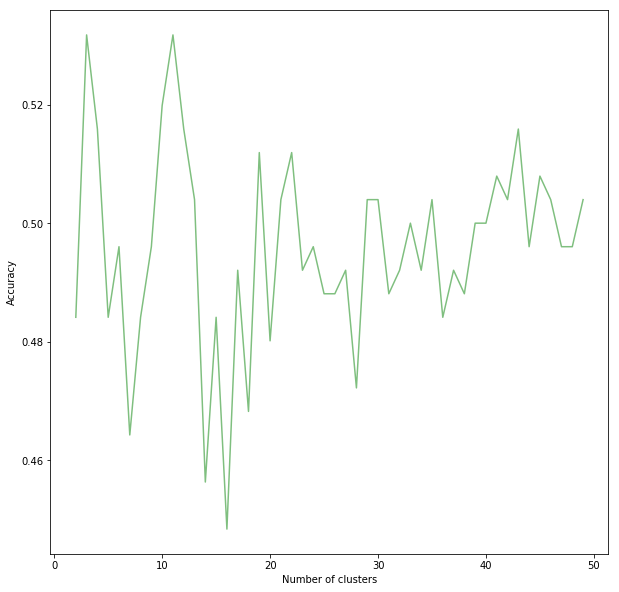

In [222]:
# Optimize the number of clusters
accuracy = []

for k in range(2,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = knn.fit(X_train,y_train).predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
   
plt.figure(figsize=(10,10))
plt.plot(range(2,50), accuracy, c="g", alpha=0.5)
plt.xlabel("Number of clusters")
plt.ylabel("Accuracy")
plt.show()

## 4.6.6 An Application to Caravan Insurance Data

In [223]:
# Import modules
from sklearn.preprocessing import StandardScaler

In [224]:
# Import data
df = pd.read_csv('./datasets/Caravan.csv')
df.head()

,Unnamed: 0,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,1,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,No
1,2,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,No
2,3,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,No
3,4,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,No
4,5,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,No


In [225]:
# Features
print(df.columns)

Index(['Unnamed: 0', 'MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD',
       'MGODRK', 'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV',
       'MFALLEEN', 'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG',
       'MBERHOOG', 'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO',
       'MSKA', 'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1',
       'MAUT2', 'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045',
       'MINK4575', 'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART',
       'PWABEDR', 'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT',
       'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG',
       'PGEZONG', 'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS',
       'PINBOED', 'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT',
       'ABESAUT', 'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT',
       'ABROM', 'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND',
       'AZEILPL', 'APLEZI

In [226]:
# Explore data
print(df.shape)

(5822, 87)


In [227]:
# Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 87 columns):
Unnamed: 0    5822 non-null int64
MOSTYPE       5822 non-null int64
MAANTHUI      5822 non-null int64
MGEMOMV       5822 non-null int64
MGEMLEEF      5822 non-null int64
MOSHOOFD      5822 non-null int64
MGODRK        5822 non-null int64
MGODPR        5822 non-null int64
MGODOV        5822 non-null int64
MGODGE        5822 non-null int64
MRELGE        5822 non-null int64
MRELSA        5822 non-null int64
MRELOV        5822 non-null int64
MFALLEEN      5822 non-null int64
MFGEKIND      5822 non-null int64
MFWEKIND      5822 non-null int64
MOPLHOOG      5822 non-null int64
MOPLMIDD      5822 non-null int64
MOPLLAAG      5822 non-null int64
MBERHOOG      5822 non-null int64
MBERZELF      5822 non-null int64
MBERBOER      5822 non-null int64
MBERMIDD      5822 non-null int64
MBERARBG      5822 non-null int64
MBERARBO      5822 non-null int64
MSKA          5822 non-null int64
MSKB1    

In [228]:
# Describe
print(df.describe())

        Unnamed: 0      MOSTYPE     MAANTHUI      MGEMOMV     MGEMLEEF  \
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000   
mean   2911.500000    24.253349     1.110615     2.678805     2.991240   
std    1680.810965    12.846706     0.405842     0.789835     0.814589   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%    1456.250000    10.000000     1.000000     2.000000     2.000000   
50%    2911.500000    30.000000     1.000000     3.000000     3.000000   
75%    4366.750000    35.000000     1.000000     3.000000     3.000000   
max    5822.000000    41.000000    10.000000     5.000000     6.000000   

          MOSHOOFD       MGODRK       MGODPR       MGODOV       MGODGE  \
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000   
mean      5.773617     0.696496     4.626932     1.069907     3.258502   
std       2.856760     1.003234     1.715843     1.017503     1.597647   
min       1.000000     0.000000     0

In [229]:
# Purchase
print(df['Purchase'].value_counts())

No     5474
Yes     348
Name: Purchase, dtype: int64


In this dataset, 384 out of 5474 customers purchased insurance. Because of the large spread of each feature, it is necessary to normalize the data.

In [230]:
# Normalization
scaler = StandardScaler()
scaler.fit(df[df.columns.difference(['Purchase'])])
df_norm = scaler.transform(df[df.columns.difference(['Purchase'])])

In [231]:
# Verify result of standardization
print(df.iloc[:,1].var())
print(df.iloc[:,2].var())
print(df_norm[:,1].var())
print(df_norm[:,2].var())

165.0378473951887
0.16470778193193808
1.0000000000000002
0.9999999999999997


We now split the data into a test set, containing the first 1,000 observations, and a training set, containing the remaining observations. We fit a KNN model on the training data using K=1, and evaluate the performance on the test data.

In [232]:
df_norm.shape

(5822, 86)

In [233]:
df.iloc[0:1000].shape

(1000, 87)

In [234]:
# Create training and test sets
X_train = df_norm[0:1000,0:86] 
y_train = (df.iloc[0:1000,-1] == "Yes")
X_test = df_norm[1000:,0:86] 
y_test = (df.iloc[1000:,-1] == "Yes")

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1000, 86) (1000,) (4822, 86) (4822,)


In [235]:
# Create, fit model, and make predictions
knn = KNeighborsClassifier(n_neighbors=1)
y_pred = knn.fit(X_train,y_train).predict(X_test)

In [236]:
# Pring accuracy
print("Accuracy = ", np.mean(y_test == y_pred))

Accuracy =  0.889879717959353


In [237]:
# Print categorization summary
print(np.unique(y_pred, return_counts=True))

(array([False,  True]), array([4502,  320]))


While the accuracy seems good, a random guess will be correct 94% of the time since the "False" category stands for 94% of the records.

In [238]:
# Create, fit model, and make predictions
knn = KNeighborsClassifier(n_neighbors=3)
y_pred = knn.fit(X_train,y_train).predict(X_test)

In [239]:
# Pring accuracy
print("Accuracy = ", np.mean(y_test == y_pred))

Accuracy =  0.9251347988386561


In [240]:
# Print categorization summary
print(np.unique(y_pred, return_counts=True))

(array([False,  True]), array([4696,  126]))


In [241]:
print(126/4696)

0.026831345826235094


In [242]:
# Confusion matrix
print(confusion_matrix(y_pred,y_test))

[[4434  262]
 [  99   27]]


In [243]:
# Classification report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

      False       0.94      0.98      0.96      4533
       True       0.21      0.09      0.13       289

avg / total       0.90      0.93      0.91      4822

